In [1]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import plotly.express as px

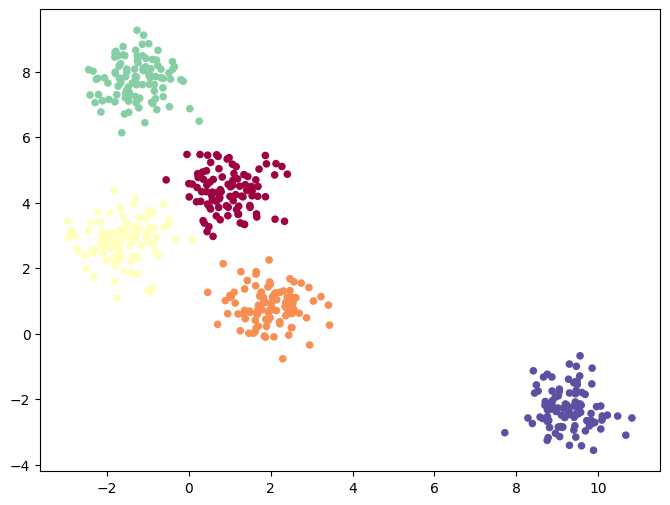

In [2]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20) 

In [3]:
def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

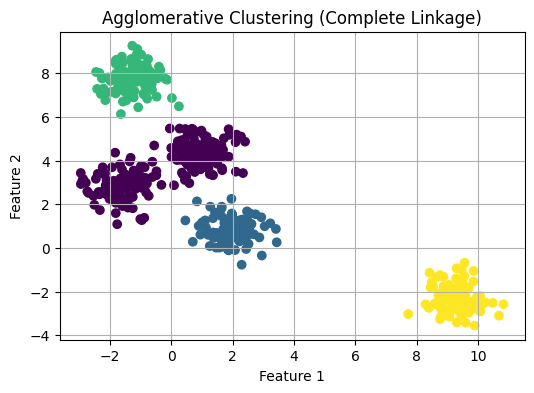

In [4]:
complete_clustering = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
complete_labels = complete_clustering.fit_predict(X)
plot_clusters(X, complete_labels, 'Agglomerative Clustering (Complete Linkage)')

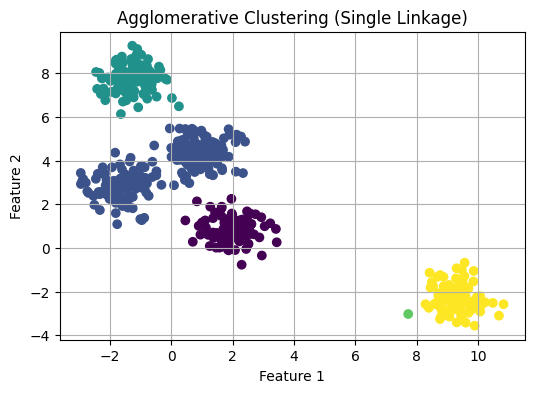

In [5]:
single_clustering = AgglomerativeClustering(n_clusters=5, linkage='single')
single_labels = single_clustering.fit_predict(X)
plot_clusters(X, single_labels, 'Agglomerative Clustering (Single Linkage)')

In [6]:
def apply_db_scan(X, eps):
    dbscan = DBSCAN(eps = eps, min_samples = 2).fit(X)
    predicted = dbscan.labels_
    n_clusters_and_noice = len(np.unique(predicted)) - 1
    print('n_clusters_and_noice ={}\n'.format(n_clusters_and_noice))

    predicted[np.where(predicted == 1)] = n_clusters_and_noice
    return predicted

predicted = apply_db_scan(X, eps = 1.6)
print(predicted)

n_clusters_and_noice =1

[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0


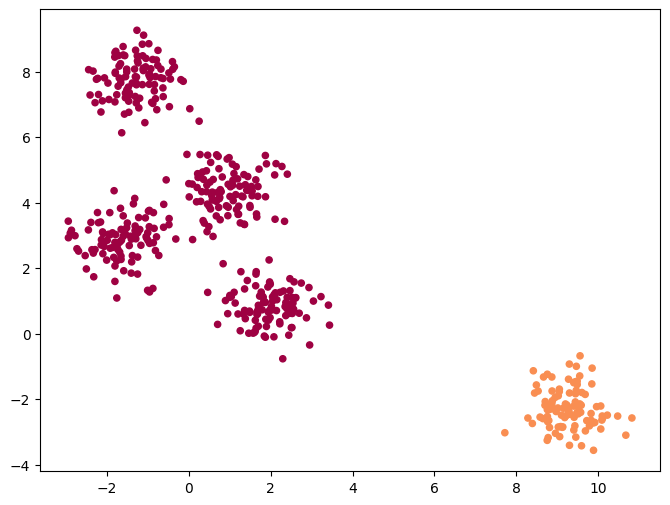

In [7]:
plt.figure(figsize = (8, 6))
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])
plt.scatter(X[:,0], X[:,1], c= colors[predicted], s= 20)

In [8]:
inertia =[]
k_range = (4, 11)
for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

fig_score = px.line(
    x=list(k_range),
    y=inertia,
    markers=True,
    labels={'x': 'Amount of clusters (k)', 'y': 'Average elbow coef'},
    title='Find optimal K with Elbow method '
)
fig_score.show()